In [82]:
import random
from math import exp
import matplotlib.pyplot as plt

In [83]:
def genpoisson(l) -> int:
    k = 0
    p = exp(-l)
    s = p

    u = random.uniform(0, 1)
    while u > s:
        k += 1
        p *= (l / k)
        s += p
    return k

Text(0, 0.5, 'Count of k')

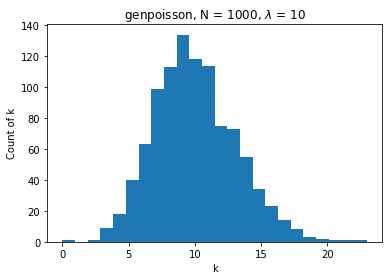

In [84]:
'''
(d)
'''
plt.figure(0)
N = 1000
l = 10
poisson_sample = []
for i in range(N):
    poisson_sample.append(genpoisson(l))
num_k_plot = max(poisson_sample) + 1

plt.hist(poisson_sample, bins = num_k_plot)
plt.title(r'genpoisson, N = 1000, $\lambda$ = 10')
plt.xlabel('k')
plt.ylabel('Count of k')


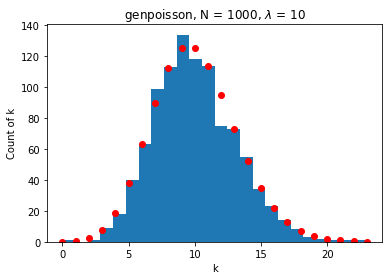

In [85]:
'''
(e)
'''
# I choose to plot the theoretical expected count of k up to 
# the max k achieved in our sample
k, expected = [], []
p = exp(-l)
for i in range(num_k_plot):
    k.append(i)
    expected.append(N * p)
    p *= (l / (i + 1))

plt.hist(poisson_sample, bins = num_k_plot, zorder = 0)
plt.title(r'genpoisson, N = 1000, $\lambda$ = 10')
plt.xlabel('k')
plt.ylabel('Count of k')
plt.scatter(k, expected, color = "red", zorder = 1)

Text(0, 0.5, 'NP(k)')

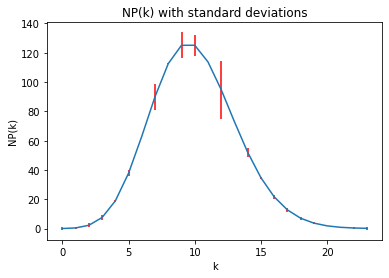

In [86]:
'''
(f)
'''

# Count of how much each k appears in our poisson sample
sample_counter = {}
for i in range(num_k_plot):
    sample_counter[i] = 0
for s in poisson_sample:
    sample_counter[s] += 1

# To calculate our standard deviations we subtract how often each k
# appears in our sample by its expected value
sdevk = []
for i in range(num_k_plot):
    sdevk.append(sample_counter[i] - expected[i])

plt.errorbar(k, expected, yerr = sdevk, ecolor = "red")
plt.title('NP(k) with standard deviations')
plt.xlabel('k')
plt.ylabel('NP(k)')

(g)